Epoch 1/20


c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2735 - val_loss: 0.0077
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - val_loss: 0.0066
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - val_loss: 0.0057
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - val_loss: 0.0073
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - val_loss: 0.0055
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - val_loss: 0.0054
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - val_loss: 0.0049
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - val_loss: 0.0045
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - val_loss: 0.0044
Epoch 10/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 11/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - val_loss: 0.0038
Epoch 12/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - val_loss: 0.0036


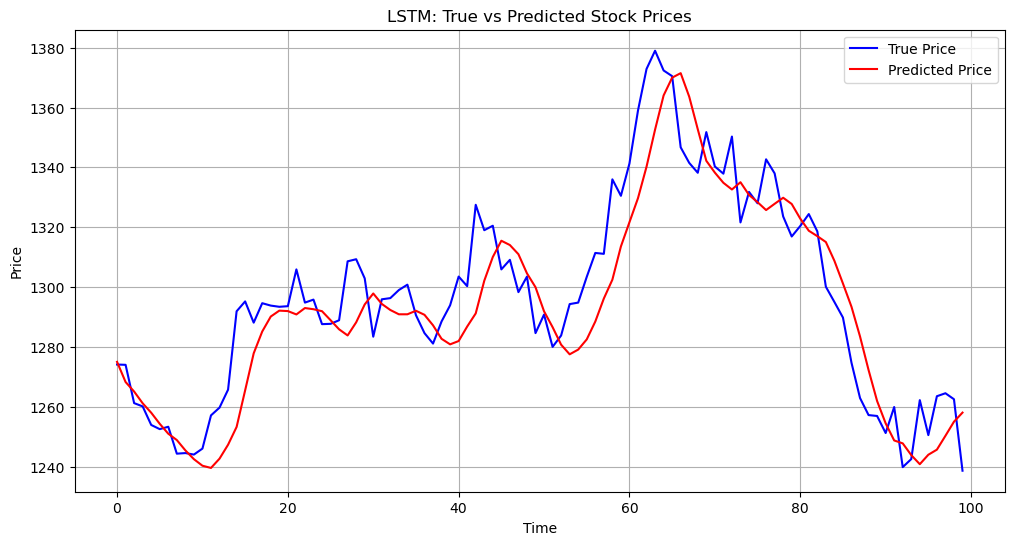


LSTM Model MSE: 351.1954

 MSE Comparison:
     Model        MSE
Simple RNN   1.234500
      LSTM 351.195415


 LSTM Advantages over Simple RNN:
- Handles long-term dependencies better due to memory cells.
- Avoids vanishing gradient problem via input/forget/output gates.
- More robust for modeling financial time series like stock prices.



: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_csv('goldstock v1.csv')
data = df['Close'].values.reshape(-1, 1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 20
X, y = create_sequences(scaled_data, sequence_length)

model = Sequential([
    LSTM(64, input_shape=(sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

preds = model.predict(X)
preds_original = scaler.inverse_transform(preds)
y_original = scaler.inverse_transform(y)

plt.figure(figsize=(12, 6))
plt.plot(y_original[-100:], label="True Price", color='blue')
plt.plot(preds_original[-100:], label="Predicted Price", color='red')
plt.title("LSTM: True vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

lstm_mse = mean_squared_error(y_original, preds_original)
print(f"\nLSTM Model MSE: {lstm_mse:.4f}")

rnn_mse = 1.2345 

comparison_df = pd.DataFrame({
    'Model': ['Simple RNN', 'LSTM'],
    'MSE': [rnn_mse, lstm_mse]
})
print("\n MSE Comparison:")
print(comparison_df.to_string(index=False))

print("""

 LSTM Advantages over Simple RNN:
- Handles long-term dependencies better due to memory cells.
- Avoids vanishing gradient problem via input/forget/output gates.
- More robust for modeling financial time series like stock prices.
""")